In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

import os

from IPython.display import Image

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
print(torch.cuda.get_device_name(device))

cuda:0
GeForce GTX 1060 with Max-Q Design


In [2]:
torch.cuda.empty_cache()

In [3]:
root = os.getcwd() + '/root'

In [4]:
images_folder = root + '/images'

In [5]:
root = os.getcwd() + "/root"
train_dir = root + "/train"
test_dir = root + "/test"

## Load the data and transform

In [6]:
# train_tfms= transforms.Compose([
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(90),
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# test_tfms = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

tfms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

batch_size = 64
num_epochs = 25
num_workers = 2

In [7]:
train_data = torchvision.datasets.ImageFolder(train_dir, transform=tfms)
test_data = torchvision.datasets.ImageFolder(test_dir, transform=tfms)

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(dataset=test_data)

In [8]:
train_data.classes

['Abyssinian',
 'American_Bulldog',
 'American_Pit_Bull_Terrier',
 'Basset_Hound',
 'Beagle',
 'Bengal',
 'Birman',
 'Bombay',
 'Boxer',
 'British_Shorthair',
 'Chihuahua',
 'Egyptian_Mau',
 'English_Cocker_Spaniel',
 'English_Setter',
 'German_Shorthaired',
 'Great_Pyrenees',
 'Havanese',
 'Japanese_Chin',
 'Keeshond',
 'Leonberger',
 'Maine_Coon',
 'Miniature_Pinscher',
 'Newfoundland',
 'Persian',
 'Pomeranian',
 'Pug',
 'Ragdoll',
 'Russian_Blue',
 'Saint_Bernard',
 'Samoyed',
 'Scottish_Terrier',
 'Shiba_Inu',
 'Siamese',
 'Sphynx',
 'Staffordshire_Bull_Terrier',
 'Wheaten_Terrier',
 'Yorkshire_Terrier']

## Viewing input images

In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.show()

In [10]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


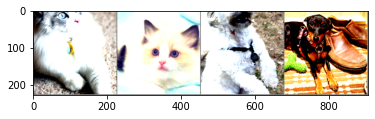

Ragdoll / Ragdoll / Havanese / Miniature_Pinscher


In [11]:
imshow(torchvision.utils.make_grid(images[0:4]))
print(' / '.join('%5s' % train_data.classes[labels[j]] for j in range(4)))

## Defining CNN model using AlexNet architecture 

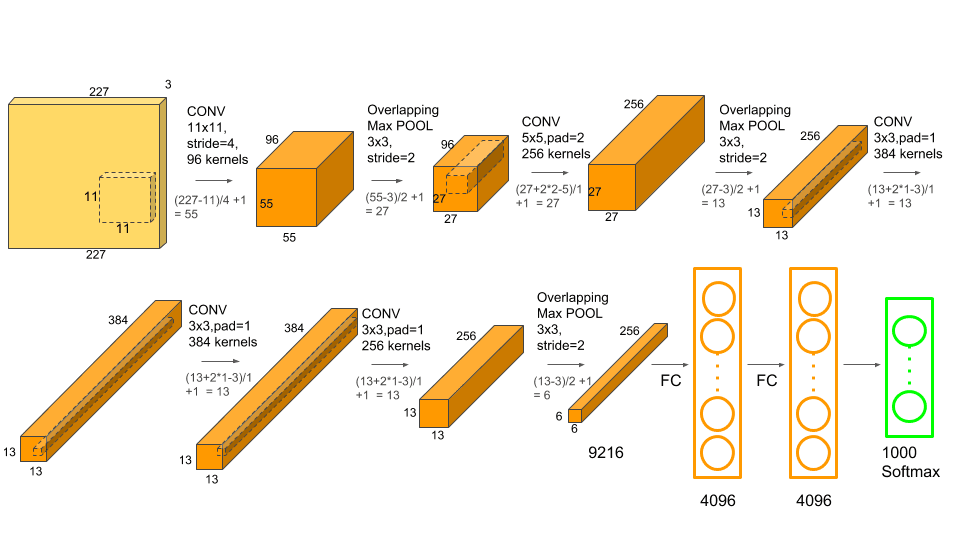

In [12]:
Image(filename="./notebook_imgs/AlexNet-1.png", width=1000, height=500)

In [13]:
AlexNet_Model = torch.hub.load('pytorch/vision:v0.8.0', 'alexnet', pretrained=True)

AlexNet_Model.classifier[4] = nn.Linear(4096, 1024)
AlexNet_Model.classifier[6] = nn.Linear(1024, 37)
# AlexNet_Model.classifier[6] = nn.Linear(4096,37)

AlexNet_Model.to(device)

Using cache found in /home/huyphuc0305/.cache/torch/hub/pytorch_vision_v0.8.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [14]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(AlexNet_Model.parameters(), lr=0.001, momentum=0.9)

In [15]:
total_step = len(train_loader)
loss_vals = []

for epoch in range(num_epochs):  # loop over the dataset multiple times
    epoch_loss = 0.0
    for i, (images, labels) in enumerate(train_loader, 0):
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        # forward + backward + optimize
        output = AlexNet_Model(images)
        loss = loss_func(output, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        epoch_loss += loss.item()
#         if (i+1) % 100 == 0:
#             print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
#                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss/len(train_loader)))
    loss_vals.append(epoch_loss/len(train_loader))

print('Finished Training of AlexNet')

Epoch [1/25], Loss: 1.9267
Epoch [2/25], Loss: 0.7672
Epoch [3/25], Loss: 0.5904
Epoch [4/25], Loss: 0.4793
Epoch [5/25], Loss: 0.3719
Epoch [6/25], Loss: 0.3072
Epoch [7/25], Loss: 0.2659
Epoch [8/25], Loss: 0.2278
Epoch [9/25], Loss: 0.1716
Epoch [10/25], Loss: 0.1603
Epoch [11/25], Loss: 0.1404
Epoch [12/25], Loss: 0.1103
Epoch [13/25], Loss: 0.1071
Epoch [14/25], Loss: 0.0947
Epoch [15/25], Loss: 0.0927
Epoch [16/25], Loss: 0.0796
Epoch [17/25], Loss: 0.0624
Epoch [18/25], Loss: 0.0754
Epoch [19/25], Loss: 0.0594
Epoch [20/25], Loss: 0.0548
Epoch [21/25], Loss: 0.0501
Epoch [22/25], Loss: 0.0390
Epoch [23/25], Loss: 0.0420
Epoch [24/25], Loss: 0.0398
Epoch [25/25], Loss: 0.0423
Finished Training of AlexNet


In [9]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = AlexNet_Model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 2218 test images: %f %%' % (100 * correct / total))

Accuracy of the network on the 2218 test images: 79.666366 %


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = AlexNet_Model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 5712 training images: %f %%' % (100 * correct / total))

Accuracy of the network on the 5712 training images: 99.082031 %


In [17]:
#Testing classification accuracy for individual classes.
classes = train_data.classes
class_correct = list(0. for i in range(37))
class_total = list(0. for i in range(37))
all_prediction = []

with torch.no_grad():
    for data in test_loader:
        image, label = data[0].to(device), data[1].to(device)
        output = AlexNet_Model(image)
        _, predicted = torch.max(output, 1)
        label_val = label.item()
        predicted_val = predicted.item()
        all_prediction.append(predicted_val)
        if predicted_val == label_val:
            class_correct[label_val] += 1
        class_total[label_val] += 1
        
for i in range(37):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Abyssinian : 75 %
Accuracy of American_Bulldog : 75 %
Accuracy of American_Pit_Bull_Terrier : 50 %
Accuracy of Basset_Hound : 81 %
Accuracy of Beagle : 73 %
Accuracy of Bengal : 85 %
Accuracy of Birman : 83 %
Accuracy of Bombay : 93 %
Accuracy of Boxer : 76 %
Accuracy of British_Shorthair : 71 %
Accuracy of Chihuahua : 71 %
Accuracy of Egyptian_Mau : 78 %
Accuracy of English_Cocker_Spaniel : 71 %
Accuracy of English_Setter : 73 %
Accuracy of German_Shorthaired : 76 %
Accuracy of Great_Pyrenees : 85 %
Accuracy of Havanese : 75 %
Accuracy of Japanese_Chin : 90 %
Accuracy of Keeshond : 96 %
Accuracy of Leonberger : 90 %
Accuracy of Maine_Coon : 75 %
Accuracy of Miniature_Pinscher : 85 %
Accuracy of Newfoundland : 90 %
Accuracy of Persian : 86 %
Accuracy of Pomeranian : 81 %
Accuracy of   Pug : 86 %
Accuracy of Ragdoll : 56 %
Accuracy of Russian_Blue : 85 %
Accuracy of Saint_Bernard : 78 %
Accuracy of Samoyed : 96 %
Accuracy of Scottish_Terrier : 83 %
Accuracy of Shiba_Inu : 88

<AxesSubplot:>

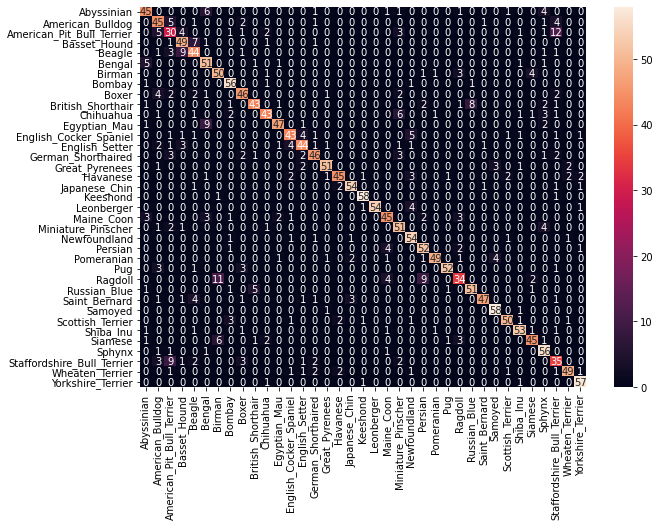

In [18]:
cm = confusion_matrix(test_data.targets, all_prediction)
df_cm = pd.DataFrame(cm, index=[i for i in train_data.classes],
                    columns=[i for i in train_data.classes])
plt.figure(figsize=(10,7
                   
                   ))
sn.heatmap(df_cm, annot=True)

In [23]:
precision, recall = 0, 0
sum_row = np.sum(cm, axis=0)
sum_col = np.sum(cm, axis=1)
for i in range(37):
    precision = precision + cm[i][i] / sum_col[i]
    recall = recall + cm[i][i] / sum_row[i]
precision = precision / 37
recall = recall / 37

In [24]:
precision

0.803246349798074

In [25]:
recall

0.8092636238731611

In [26]:
f1 = 2 * precision * recall / (precision + recall)
f1

0.8062437597462085

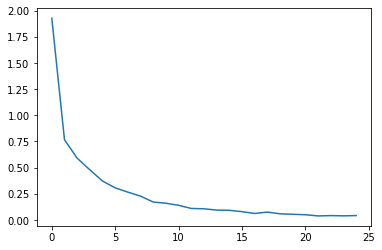

In [19]:
plt.plot(range(num_epochs), loss_vals)

### Save and Load

In [20]:
!mkdir models

mkdir: cannot create directory ‘models’: File exists


In [20]:
torch.save(AlexNet_Model.state_dict(), 'models/weights_alexnet.h5')

In [8]:
AlexNet_Model = torch.hub.load('pytorch/vision:v0.8.0', 'alexnet', pretrained=False)
AlexNet_Model.classifier[4] = nn.Linear(4096, 1024)
AlexNet_Model.classifier[6] = nn.Linear(1024, 37)
AlexNet_Model.to(device)
AlexNet_Model.load_state_dict(torch.load('models/weights_alexnet.h5'))

Using cache found in /home/huyphuc0305/.cache/torch/hub/pytorch_vision_v0.8.0


<All keys matched successfully>